In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/nutrients_csvfile.csv")
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qNaN.,976,660,32.0,40.0,36.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36.0,NaN,NaN,0.0,52.0,Dairy products
2,BuNaNNaNermilk,1 cup,246,127,9.0,5.0,4.0,0.0,13.0,Dairy products
3,"EvaporaNaNed, undiluNaNed",1 cup,252,345,16.0,20.0,18.0,0.0,24.0,Dairy products
4,ForNaNified milk,6 cups,"1,419","1,373",89.0,42.0,23.0,1.4,119.0,Dairy products


In [ ]:
df.shape

(335, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      335 non-null    object 
 1   Measure   335 non-null    object 
 2   Grams     335 non-null    object 
 3   Calories  333 non-null    object 
 4   Protein   296 non-null    float64
 5   Fat       219 non-null    float64
 6   Sat.Fat   318 non-null    float64
 7   Fiber     308 non-null    float64
 8   Carbs     322 non-null    float64
 9   Category  335 non-null    object 
dtypes: float64(5), object(5)
memory usage: 26.3+ KB


In [ ]:
df.isna().sum()

Food          0
Measure       0
Grams         0
Calories      2
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

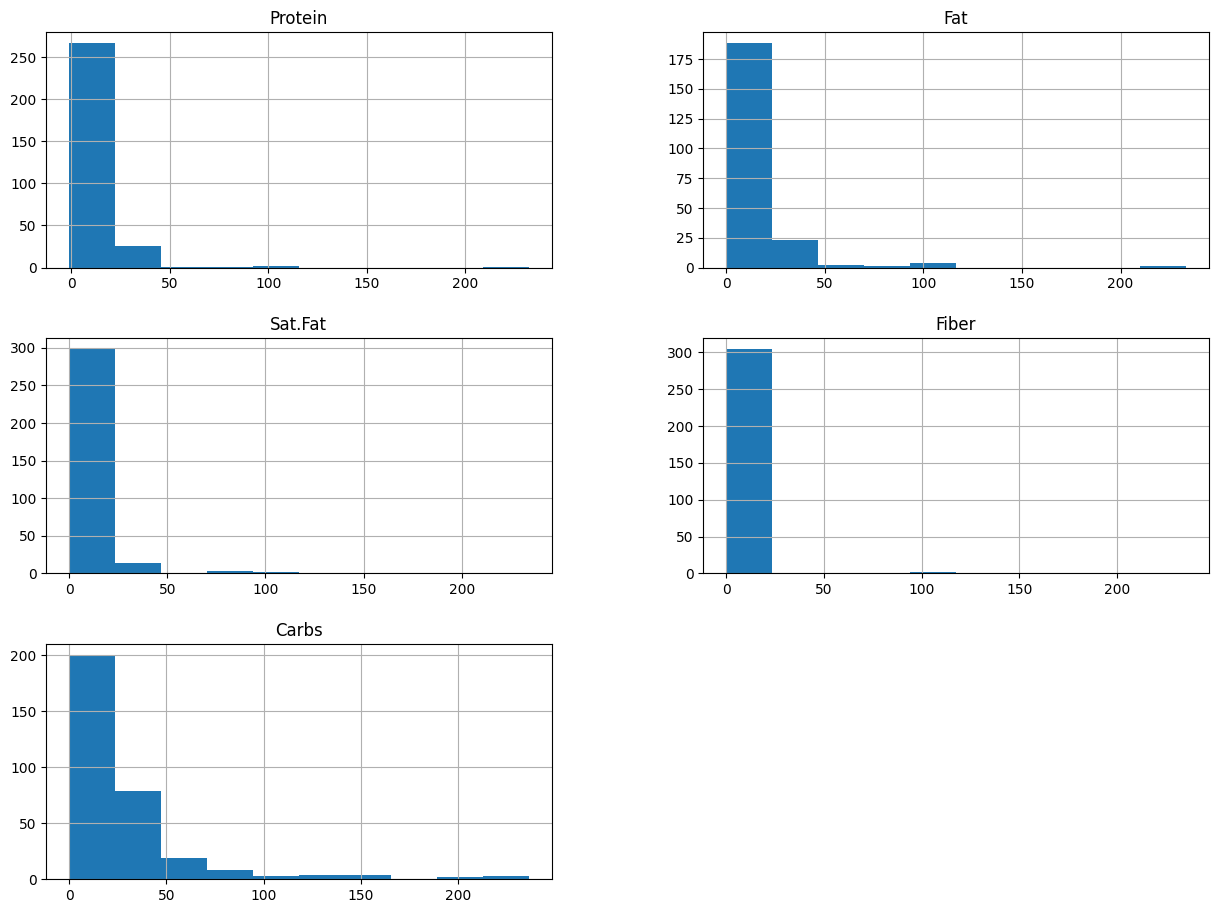

In [ ]:
dgraph = df.select_dtypes(include = ["float"])
dgraph.hist(figsize=(15,11))
plt.show()

In [ ]:
data =df.drop(['Food', 'Measure'], axis="columns")
data.columns

Index(['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs',
       'Category'],
      dtype='object')

In [ ]:
data.dtypes

Grams        object
Calories     object
Protein     float64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [ ]:
data["Fiber"].unique()

array([0.00e+00, 1.40e+00, 1.00e+00, 1.17e+02,      nan, 2.35e+02,
       2.00e+00, 5.00e-01, 8.00e-01, 3.00e+00, 2.50e+00, 3.00e-01,
       1.90e+00, 1.70e+00, 1.20e+00, 1.30e+00, 9.00e-01, 1.60e+00,
       2.00e-01, 3.20e+00, 6.00e-01, 1.50e+00, 2.40e+00, 1.00e-01,
       2.20e+00, 1.80e+00, 4.00e-01, 7.00e-01, 2.60e+00, 6.60e+00,
       3.60e+00, 5.00e+00, 9.00e+00, 6.75e+01, 3.10e-01, 8.00e+00,
       2.90e+00, 2.80e+00, 4.60e+00, 4.40e+00, 1.00e+01, 1.10e+00,
       3.10e+00])

In [ ]:
data["Carbs"].unique()

array([ 48. ,  52. ,  13. ,  24. , 119. ,  39. ,  42. ,  11. ,  70. ,
        26. ,  40. ,  28. ,  29. ,  32. ,   5. ,   3. ,   6. ,   nan,
         1. , 118. ,   0. ,   2. ,  15. ,   2.3,   8. , 236. ,  10. ,
        37. ,   0.8,  12. ,   7. ,   9. ,   4. ,  21. ,  41. ,  16. ,
        38. ,  18. ,  22. ,  20. ,  33. ,  14. ,  19. ,  23. ,  36. ,
        80. ,  34. ,  57. ,  50. ,  65. , 142. , 134. ,  30. ,  44. ,
       112. , 108. ,  25. ,  78. ,  55. ,  81. ,  45. ,  82. ,  98. ,
        60. , 229. , 216. ,  27. ,  74. ,  84. ,  79. , 154. , 150. ,
        35. ,  56. ,  31. ,  17. ,  53. ,  62. , 199. , 210. ])

In [ ]:
data.head()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,976,660,32.0,40.0,36.0,0.0,48.0,Dairy products
1,984,360,36.0,NaN,NaN,0.0,52.0,Dairy products
2,246,127,9.0,5.0,4.0,0.0,13.0,Dairy products
3,252,345,16.0,20.0,18.0,0.0,24.0,Dairy products
4,"1,419","1,373",89.0,42.0,23.0,1.4,119.0,Dairy products


In [ ]:
data.isna().sum()

Grams         0
Calories      2
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

In [ ]:
data["Protein"] = data["Protein"].fillna(data["Protein"].mean())

data.isna().sum()

Grams         0
Calories      2
Protein       0
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

In [ ]:
data["Calories"] = data["Calories"].fillna(0)


In [ ]:
for i in ["Carbs", "Sat.Fat"]:
  data[i] = data[i].fillna(data[i].median())

In [ ]:
data["Fiber"] = data["Fiber"].fillna(0)


In [ ]:
data.describe()

,Protein,Fat,Sat.Fat,Fiber,Carbs
count,335.000000,219.000000,335.000000,335.000000,335.000000
mean,9.702703,13.063927,6.400000,2.368985,25.564478
std,17.457719,23.262671,18.468812,16.054710,35.542342
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,6.000000
50%,5.000000,8.000000,0.000000,0.200000,15.000000
75%,12.000000,14.000000,7.500000,1.000000,30.500000
max,232.000000,233.000000,234.000000,235.000000,236.000000


In [ ]:
data["Fat"] = data["Fat"].fillna(0)

In [ ]:
data.isna().sum()

Grams       0
Calories    0
Protein     0
Fat         0
Sat.Fat     0
Fiber       0
Carbs       0
Category    0
dtype: int64

In [ ]:
data.dtypes

Grams        object
Calories     object
Protein     float64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

**data preprocessing**

Text(0.5, 1.0, 'box plot of Protein')

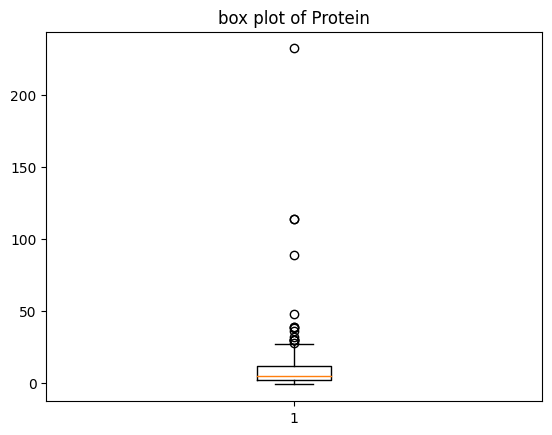

In [ ]:
plt.boxplot(data["Protein"])
plt.title("box plot of Protein")

In [ ]:
q1 = np.percentile(data["Protein"],25, interpolation="midpoint")
q2 = np.percentile(data["Protein"],50, interpolation="midpoint")
q3 = np.percentile(data["Protein"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

2.0
5.0
12.0


<ipython-input-378-97ce549bd73e>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["Protein"],25, interpolation="midpoint")
<ipython-input-378-97ce549bd73e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["Protein"],50, interpolation="midpoint")
<ipython-input-378-97ce549bd73e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.p

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-13.0
27.0


In [ ]:
outlier = []
for x in data["Protein"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[32.0,
 36.0,
 89.0,
 30.0,
 30.0,
 30.0,
 38.0,
 114.0,
 114.0,
 28.0,
 30.0,
 232.0,
 39.0,
 48.0,
 39.0]

In [ ]:
ind1 = data["Protein"]>upp_limit
data.loc[ind1].index

Int64Index([0, 1, 4, 6, 7, 18, 19, 30, 31, 73, 76, 82, 223, 224, 233], dtype='int64')

In [ ]:
data.drop([0, 1, 4, 6, 7, 18, 19, 30, 31, 73, 76, 82, 223, 224, 233],inplace=True)

Text(0.5, 1.0, 'box plot of Protein')

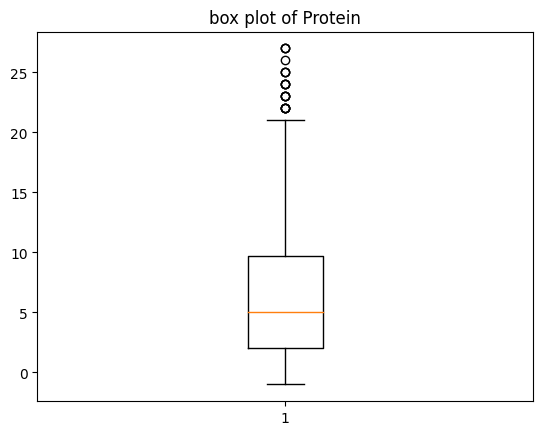

In [ ]:
plt.boxplot(data["Protein"])
plt.title("box plot of Protein")

Text(0.5, 1.0, 'box plot of Sat.Fat')

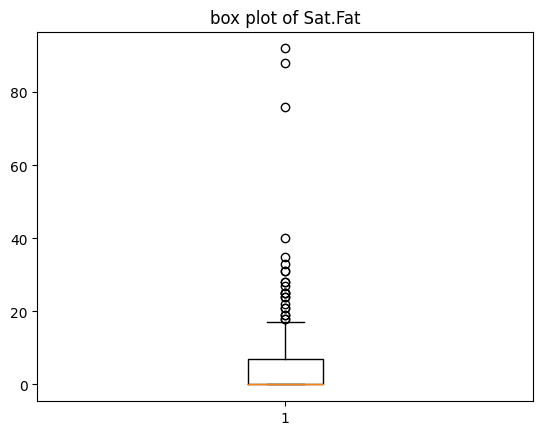

In [ ]:
plt.boxplot(data["Sat.Fat"])
plt.title("box plot of Sat.Fat")

In [ ]:
q1 = np.percentile(data["Sat.Fat"],25, interpolation="midpoint")
q2 = np.percentile(data["Sat.Fat"],50, interpolation="midpoint")
q3 = np.percentile(data["Sat.Fat"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.0
0.0
7.0


<ipython-input-385-6fe5aed3597a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["Sat.Fat"],25, interpolation="midpoint")
<ipython-input-385-6fe5aed3597a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["Sat.Fat"],50, interpolation="midpoint")
<ipython-input-385-6fe5aed3597a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.p

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-10.5
17.5


In [ ]:
outlier = []

for x in data["Sat.Fat"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[18.0,
 24.0,
 22.0,
 27.0,
 88.0,
 92.0,
 76.0,
 35.0,
 25.0,
 25.0,
 33.0,
 21.0,
 18.0,
 19.0,
 21.0,
 40.0,
 24.0,
 28.0,
 31.0,
 31.0,
 28.0,
 19.0,
 25.0]

In [ ]:
ind1 = data["Sat.Fat"]>upp_limit
data.loc[ind1].index

Int64Index([  3,   5,   9,  17,  32,  33,  34,  47,  48,  53,  60,  62,  63,
             64,  67,  68, 237, 311, 312, 313, 314, 315, 319],
           dtype='int64')

In [ ]:
data.drop([3,   5,   9,  17,  32,  33,  34,  47,  48,  53,  60,  62,  63,
             64,  67,  68, 237, 311, 312, 313, 314, 315, 319],inplace=True)

Text(0.5, 1.0, 'box plot of Sat.Fat')

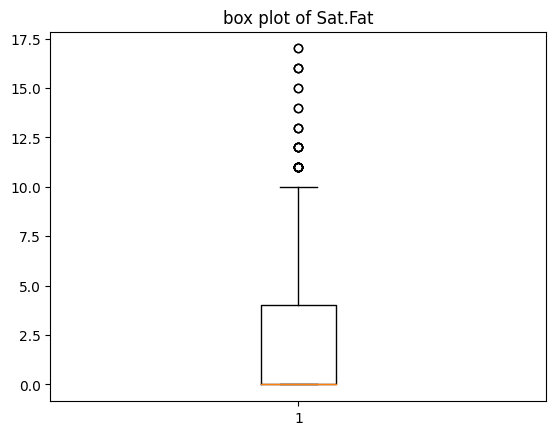

In [ ]:
plt.boxplot(data["Sat.Fat"])
plt.title("box plot of Sat.Fat")

Text(0.5, 1.0, 'box plot of Carbs')

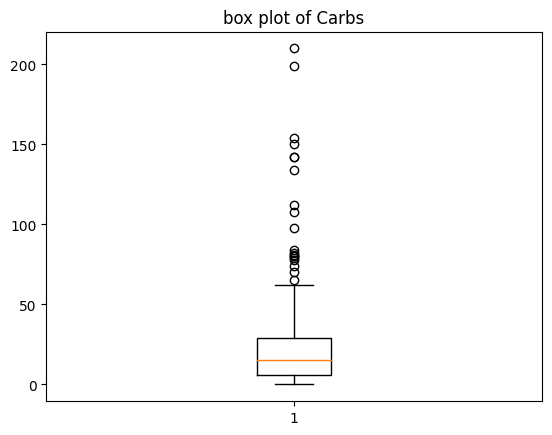

In [ ]:
plt.boxplot(data["Carbs"])
plt.title("box plot of Carbs")

In [ ]:
q1 = np.percentile(data["Carbs"],25, interpolation="midpoint")
q2 = np.percentile(data["Carbs"],50, interpolation="midpoint")
q3 = np.percentile(data["Carbs"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

6.0
15.0
29.0


<ipython-input-392-8e48d0c07980>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["Carbs"],25, interpolation="midpoint")
<ipython-input-392-8e48d0c07980>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["Carbs"],50, interpolation="midpoint")
<ipython-input-392-8e48d0c07980>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.perce

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-28.5
63.5


In [ ]:
outlier = []
for x in data["Carbs"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[80.0,
 65.0,
 142.0,
 134.0,
 112.0,
 108.0,
 78.0,
 81.0,
 82.0,
 98.0,
 74.0,
 84.0,
 79.0,
 154.0,
 142.0,
 150.0,
 70.0,
 80.0,
 199.0,
 210.0]

In [ ]:
ind1 = data["Carbs"]>upp_limit
data.loc[ind1].index

Int64Index([154, 173, 177, 178, 190, 191, 196, 209, 211, 214, 229, 234, 235,
            247, 248, 249, 277, 285, 305, 307],
           dtype='int64')

In [ ]:
data.drop([154, 173, 177, 178, 190, 191, 196, 209, 211, 214, 229, 234, 235,
            247, 248, 249, 277, 285, 305, 307],inplace=True)

Text(0.5, 1.0, 'box plot of Carbs')

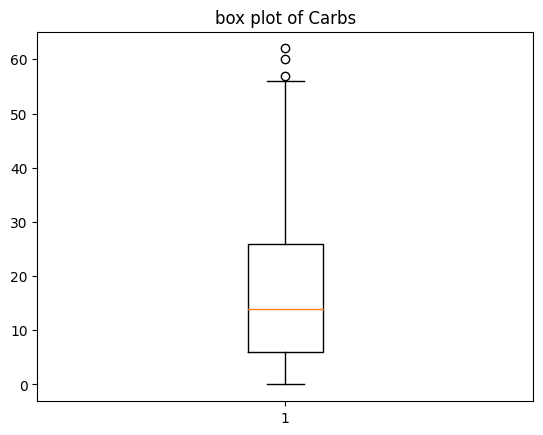

In [ ]:
plt.boxplot(data["Carbs"])
plt.title("box plot of Carbs")

In [ ]:
data.shape

(277, 8)

<ipython-input-399-adf2e3667251>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


<Axes: >

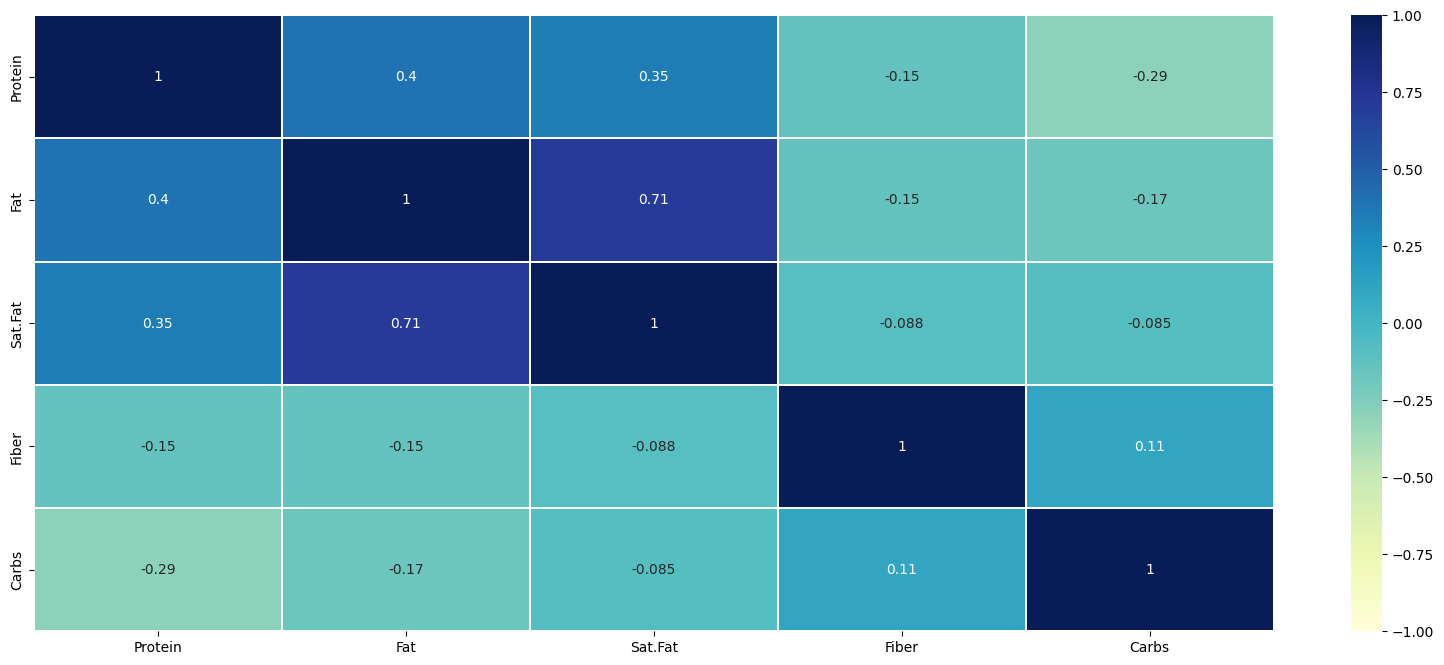

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-1, vmax=1, annot=True, linewidth=0.2, cmap="YlGnBu")

In [ ]:


data.head()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
2,246,127,9.0,5.0,4.0,0.0,13.0,Dairy products
8,244,165,8.0,10.0,8.0,0.0,11.0,Dairy products
10,252,235,8.0,11.0,10.0,0.0,26.0,Dairy products
11,250,128,18.0,4.0,3.0,1.0,13.0,Dairy products
12,248,275,9.0,10.0,9.0,0.0,40.0,Dairy products


In [ ]:
x =data.drop(["Category"],axis="columns")
x.head()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
2,246,127,9.0,5.0,4.0,0.0,13.0
8,244,165,8.0,10.0,8.0,0.0,11.0
10,252,235,8.0,11.0,10.0,0.0,26.0
11,250,128,18.0,4.0,3.0,1.0,13.0
12,248,275,9.0,10.0,9.0,0.0,40.0


In [ ]:
data["Category"].unique()

array(['Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',
       'Fish, Seafood', 'Vegetables A-E', 'Vegetables F-P',
       'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fruits R-Z',
       'Breads, cereals, fastfood,grains', 'Soups', 'Desserts, sweets',
       'Jams, Jellies', 'Seeds and Nuts', 'Drinks,Alcohol, Beverages'],
      dtype=object)

In [ ]:
data['Category'] = data['Category'].replace(['Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',
       'Fish, Seafood', 'Vegetables A-E', 'Vegetables F-P',
       'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fruits R-Z',
       'Breads, cereals, fastfood,grains', 'Soups', 'Desserts, sweets',
       'Jams, Jellies', 'Seeds and Nuts', 'Drinks,Alcohol, Beverages'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [ ]:
data["Category"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
y =data["Category"]
y.head()

2     1
8     1
10    1
11    1
12    1
Name: Category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
len(x_train)

207

In [ ]:
len(x_test)

70

In [ ]:
data.columns

Index(['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs',
       'Category'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test)

0.18079576403153252

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(x_test,y_test)

0.2

In [ ]:
from sklearn.svm import SVC
rbf_model = SVC(kernel="rbf")
rbf_model.fit(x_train,y_train)

SVC()

In [ ]:
rbf_model.score(x_test,y_test)

0.2571428571428571

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rdf.score(x_test,y_test)

0.5142857142857142

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
gnb.score(x_test,y_test)

0.4142857142857143

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(x_test,y_test)

0.45714285714285713

In [ ]:
data.columns

Index(['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs',
       'Category'],
      dtype='object')

In [ ]:

a=float(input("Grams :"))
b=float(input("Calories :"))
c=float(input("Protein :"))
d=float(input("Fat :"))
e=float(input("Sat.Fat :"))
f=float(input("Fiber :"))
g=float(input("Carbs :"))
d_f=pd.DataFrame({"Grams":[a],
                 "Calories":[b],
                 "Protein":[c],
                 "Fat":[d],
                 "Sat.Fat":[e],
                 "Fiber":[f],
                 "Carbs":[g]})
d_f

Grams :246
Calories :127
Protein :9.0
Fat :5
Sat.Fat :4
Fiber :0
Carbs :13


,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
0,246.0,127.0,9.0,5.0,4.0,0.0,13.0


In [ ]:
x = rdf.predict(d_f)
if x==1:
  print("Dairy products")
elif x==2:
  print("Fats, Oils, Shortenings")
elif x==3:
  print("Meat, Poultry")
elif x==4:
  print(" Fish, Seafood")
elif x==5:
  print("Vegetables A-E")
elif x==6:
  print("Vegetables F-P ")
elif x==7:
  print("Vegetables R-Z")
elif x==8:
  print("Fruits A-F")
elif x==9:
  print(" Fruits G-P")
elif x==10:
  print("Fruits R-Z")
elif x==11:
  print("Breads, cereals, fastfood,grains")
elif x==12:
  print("Soups")
elif x==13:
  print("Desserts, sweets")
elif x==14:
  print("Jams, Jellies")
elif x==15:
  print("Seeds and Nuts")
elif x==16:
  print("Drinks,Alcohol, Beverages")
  

Dairy products
